<a href="https://colab.research.google.com/github/jasonhckim/Logistic_Regression_Project/blob/main/Step2_Logistic_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
##SECTION 1 Data Loading

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [78]:
dataset = pd.read_csv('/content/portu_banking_final.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [79]:
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [80]:
df = dataset

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [82]:
df.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [83]:
## Section 2 Data Cleaning

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [85]:
## AGE dtype is "object" it should be int64

In [86]:
## Missing values
# Identifying missing values

miss_val = df.isna().sum()
miss_val

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f88d0856190>],
 'caps': [<matplotlib.lines.Line2D at 0x7f88d085d250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f88d0863290>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f88d085dd10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f88d0856790>,
  <matplotlib.lines.Line2D at 0x7f88d0856cd0>]}

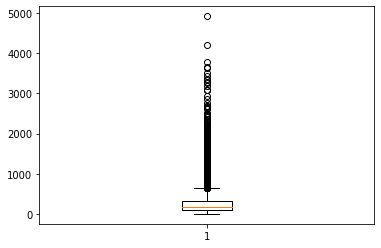

In [87]:
plt.boxplot(df['duration'])

In [88]:
Q1= np.percentile(df['duration'],25,interpolation='midpoint')
Q2= np.percentile(df['duration'],75,interpolation='midpoint')
IQR = Q2-Q1
low_limit=Q1-1.5*IQR
up_limit=Q2+1.5*IQR

In [89]:
df2 = df

In [90]:
df2=df2[df2['duration']<up_limit]
df2=df2[df2['duration']>low_limit]

{'boxes': [<matplotlib.lines.Line2D at 0x7f88d07c30d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f88d07c9190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f88d07d21d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f88d07c9c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f88d07c36d0>,
  <matplotlib.lines.Line2D at 0x7f88d07c3c10>]}

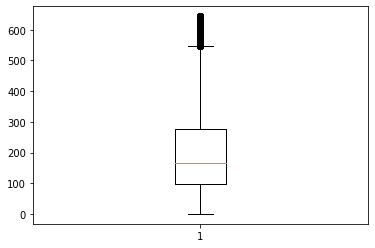

In [91]:
plt.boxplot(df2['duration'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f88d07b1290>],
 'caps': [<matplotlib.lines.Line2D at 0x7f88d07b8310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f88d073f350>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f88d07b8dd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f88d07b1850>,
  <matplotlib.lines.Line2D at 0x7f88d07b1d90>]}

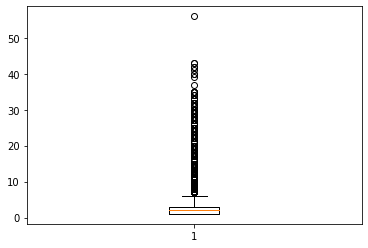

In [92]:
plt.boxplot(df['campaign'])

In [93]:
Q1= np.percentile(df['campaign'],25,interpolation='midpoint')
Q2= np.percentile(df['campaign'],75,interpolation='midpoint')
IQR = Q2-Q1
low_limit=Q1-1.5*IQR
up_limit=Q2+1.5*IQR

In [94]:
df2=df2[df2['campaign']<up_limit]
df2=df2[df2['campaign']>low_limit]

{'boxes': [<matplotlib.lines.Line2D at 0x7f88d0722110>],
 'caps': [<matplotlib.lines.Line2D at 0x7f88d072a1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f88d0734210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f88d072ac90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f88d0722710>,
  <matplotlib.lines.Line2D at 0x7f88d0722c50>]}

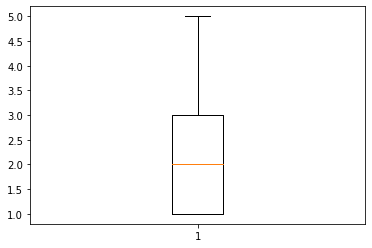

In [95]:
plt.boxplot(df2['campaign'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f88d069c110>],
 'caps': [<matplotlib.lines.Line2D at 0x7f88d06a2190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f88d06aa1d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f88d06a2c50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f88d069c6d0>,
  <matplotlib.lines.Line2D at 0x7f88d069cc10>]}

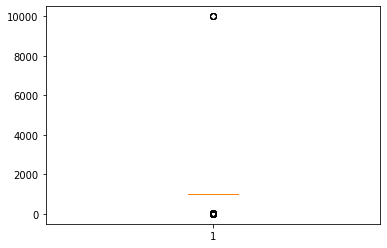

In [96]:
plt.boxplot(df['pdays'])

In [97]:
Q1= np.percentile(df['pdays'],25,interpolation='midpoint')
Q2= np.percentile(df['pdays'],75,interpolation='midpoint')
IQR = Q2-Q1
low_limit=Q1-1.5*IQR
up_limit=Q2+1.5*IQR

In [98]:
df2=df2[df2['pdays']<up_limit]
df2=df2[df2['pdays']>low_limit]

{'boxes': [<matplotlib.lines.Line2D at 0x7f88d0606ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f88d060cf90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f88d0614fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f88d0614a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f88d060c510>,
  <matplotlib.lines.Line2D at 0x7f88d060ca50>]}

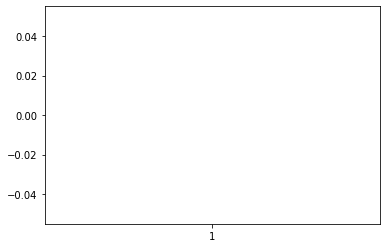

In [99]:
plt.boxplot(df2['pdays'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f88d05ebf90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f88d057c050>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f88d0585090>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f88d057cb10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f88d05f5590>,
  <matplotlib.lines.Line2D at 0x7f88d05f5ad0>]}

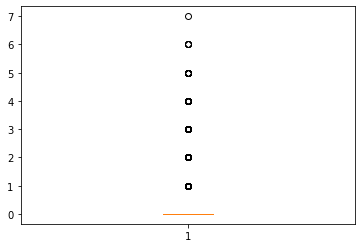

In [100]:
plt.boxplot(df['previous'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f88d05679d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f88d05737d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f88d04f97d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f88d04f9290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f88d0567e50>,
  <matplotlib.lines.Line2D at 0x7f88d0573290>]}

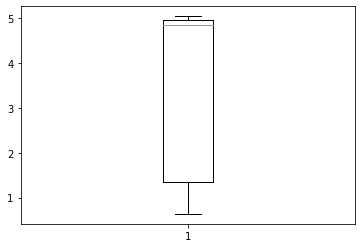

In [101]:
plt.boxplot(df['euribor3m'])

In [102]:
# Constructing correlation Matrix
df2 = df[:]
data_corr = df2.corr()
data_corr

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
duration,1.000000,-0.071699,-0.044035,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,-0.071699,1.000000,0.045353,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.044035,0.045353,1.000000,-0.518260,0.241416,0.070331,-0.082578,0.263918,0.331380,-0.288609
previous,0.020640,-0.079141,-0.518260,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.027968,0.150754,0.241416,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.005312,0.127836,0.070331,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,-0.008173,-0.013733,-0.082578,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,-0.032897,0.135133,0.263918,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.044703,0.144095,0.331380,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678
y,0.405274,-0.066357,-0.288609,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,1.000000


In [103]:
df2.describe()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,963.568005,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,259.279249,2.770014,211.772296,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,4918.000000,56.000000,9999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [104]:
df2.groupby('y').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,
0,220.844807,2.633085,985.345135,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [105]:
df2.groupby('job').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,
ADMIN.,637.000000,1.500000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.858500,5191.000000,0.000000
BLUE-COLLAR,5.000000,7.000000,999.000000,1.000000,-1.800000,92.893000,-46.200000,1.281000,5099.100000,0.000000
HOUSEMAID,84.000000,1.000000,999.000000,0.000000,-0.100000,93.200000,-42.000000,4.153000,5195.800000,0.000000
MANAGEMENT,1225.000000,2.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.884000,5076.200000,0.000000
RETIRED,545.000000,1.666667,668.000000,1.000000,-1.566667,93.142667,-37.233333,1.976667,5087.866667,0.333333
SERVICES,238.333333,2.000000,999.000000,0.000000,1.200000,94.151000,-38.200000,4.892000,5203.366667,0.000000
STUDENT,638.500000,1.500000,505.500000,0.500000,-1.750000,94.045500,-40.150000,0.752500,5000.150000,1.000000
TECHNICIAN,834.000000,9.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.855000,5191.000000,0.000000
UNKNOWN,54.000000,4.000000,999.000000,0.000000,1.100000,93.994000,-36.400000,4.864000,5191.000000,0.000000


In [106]:
df2.groupby('marital').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,
D,87.500000,1.250000,999.000000,0.000000,1.250000,93.974250,-37.675000,4.909750,5209.550000,0.000000
M,418.400000,2.600000,999.000000,0.200000,-0.960000,92.931400,-37.560000,2.589200,5141.540000,0.000000
S,283.333333,2.000000,999.000000,0.000000,-0.233333,93.396333,-34.733333,3.531333,5152.733333,0.000000
divorced,253.934679,2.614583,968.613498,0.168837,0.163043,93.606244,-40.709701,3.714567,5170.845074,0.103299
married,257.406332,2.572804,967.963528,0.155599,0.183854,93.597501,-40.271203,3.746064,5171.854853,0.101593
single,261.518720,2.533939,952.231474,0.211414,-0.167972,93.517331,-40.920303,3.317391,5155.199905,0.140078
unknown,312.725000,3.187500,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [107]:
df2.groupby('education').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,
basic-4y,259.750000,4.250000,915.916667,0.250000,0.166667,93.747500,-42.225000,3.615083,5167.266667,0.083333
basic-6y,222.500000,2.500000,999.000000,0.000000,0.766667,93.784667,-39.933333,4.313333,5194.233333,0.000000
basic-9y,144.900000,1.600000,999.000000,0.200000,0.270000,93.732300,-42.120000,3.716900,5161.490000,0.000000
basic.4y,264.842459,2.595821,970.171230,0.146734,0.216066,93.658052,-40.234150,3.752162,5170.133117,0.102546
basic.6y,264.524497,2.556430,980.319335,0.129484,0.229746,93.649709,-41.131015,3.771524,5174.666842,0.082240
basic.9y,261.484673,2.533886,979.100249,0.141342,0.159056,93.623218,-41.325435,3.697932,5172.311914,0.078376
high.school,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,252.533855,2.586115,962.482548,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485


Section III : Exploratory Data Analysis

Let us put Matplotlib to use !

Part I : Create bar graphs to the frequency of purchase with respect to the job, martial etc 

Part II : Also create stacked bars to same data columns with respect to 

Part III : Explore the age column using a histogram and note down your 
observations

In [108]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [109]:
#Load the data set
data = df2

In [110]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [111]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [112]:
data['education']=data['education'].replace('basic-4y','basic.4y')
data['education']=data['education'].replace('basic-6y','basic.6y')
data['education']=data['education'].replace('basic-9y','basic.9y')
data['education']=data['education'].replace('unknown','university.degree')
data['education']=data['education'].replace('illiterate','high.school')

In [113]:
data['marital'].value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [114]:
data['marital']=data['marital'].replace('M','married')
data['marital']=data['marital'].replace('D','divorced')
data['marital']=data['marital'].replace('S','single')

In [115]:
data['marital']=data['marital'].replace('unknown','married')

In [116]:
data['job'].value_counts()

admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
STUDENT              2
ADMIN.               2
UNKNOWN              1
BLUE-COLLAR          1
HOUSEMAID            1
TECHNICIAN           1
MANAGEMENT           1
Name: job, dtype: int64

In [117]:
data['job']=data['job'].replace('ADMIN.','admin.')
data['job']=data['job'].replace('UNKNOWN','admin.')
data['job']=data['job'].replace('RETIRED','retired')
data['job']=data['job'].replace('SERVICES','services')
data['job']=data['job'].replace('STUDENT','student')
data['job']=data['job'].replace('TECHNICIAN','technician')
data['job']=data['job'].replace('BLUE-COLLAR','blue-collar')
data['job']=data['job'].replace('HOUSEMAID','housemaid')
data['job']=data['job'].replace('MANAGEMENT','management')

In [118]:
data['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [119]:
data['age']=data['age'].replace(['18-25'],21)
data['age']=data['age'].replace(['30-32'],31)
data['age']=data['age'].replace(['25-30'],27)
data['age']=data['age'].replace(['30-35'],32)
data['age']=data['age'].replace(['35-30'],32)
data['age']=data['age'].replace(['50-55'],52)
data['age']=data['age'].replace(['20-25'],23)
data['age']=data['age'].replace(['20-40'],30)
data['age']=data['age'].replace(['35-40'],37)
data['age']=data['age'].replace(['30-40'],35)
data['age']=data['age'].replace(['45-50'],47)

In [120]:
data['age']=data['age'].apply(pd.to_numeric)

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [122]:
data['age']

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: int64

In [123]:
data['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

In [124]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [125]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

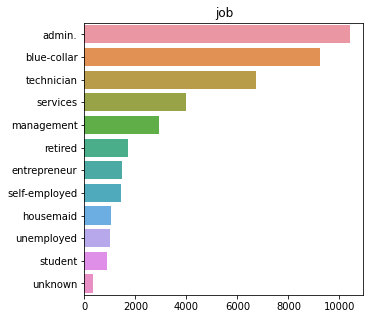

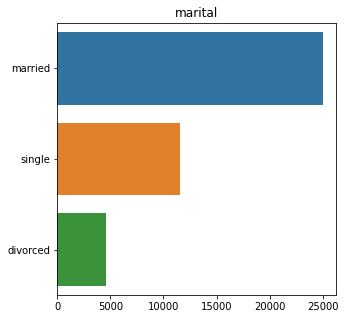

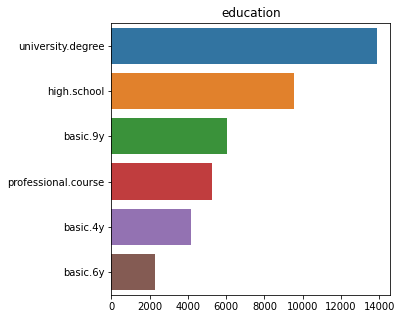

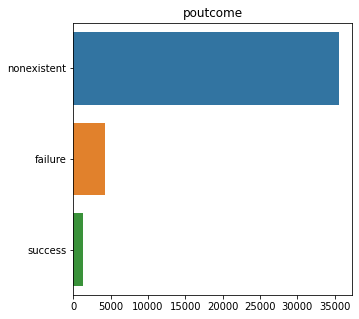

In [126]:
# Plot the relation of each feature with each species
columns = [ 'job', 'marital', 'education','poutcome']
for col in columns:
  plt.figure(figsize=(5,5))
  sns.barplot(data[col].value_counts().values,data[col].value_counts().index)
  plt.title(col)
plt.show()

(array([1.6660e+03, 1.1344e+04, 1.2036e+04, 8.0880e+03, 5.8220e+03,
        1.6130e+03, 3.1800e+02, 2.0200e+02, 8.9000e+01, 1.0000e+01]),
 array([17. , 25.1, 33.2, 41.3, 49.4, 57.5, 65.6, 73.7, 81.8, 89.9, 98. ]),
 <a list of 10 Patch objects>)

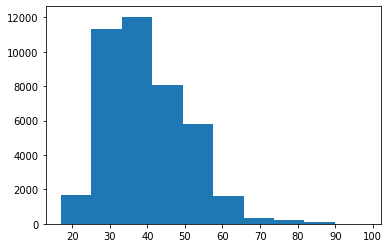

In [127]:
plt.hist(data['age'])

From 20 to 40 it increase rapidly
From 40 to 50 it dec slowly
Then from 50 to 90 dec rapidly

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [129]:
data1 = pd.get_dummies(data,columns =['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])

In [130]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  float64
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [131]:
data1.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [132]:
data1.shape

(41188, 61)

In [133]:
X=data1.drop(['y'],axis=1)
y=data1['y']

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [135]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [136]:
y_pred = model.predict(X_test)
Score=model.score(X_test,y_test)
Score

0.9073399692481994

In [137]:
from sklearn.metrics import classification_report
print('Classification report',classification_report(y_test,y_pred))

Classification report               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10924
           1       0.67      0.40      0.50      1433

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



In [138]:
print(confusion_matrix(y_test,y_pred))

[[10636   288]
 [  857   576]]


In [139]:
## SMOTE


In [140]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [141]:
x_sm,y_sm = smote.fit_resample(X,y)

In [142]:
from collections import Counter
print("Before SMOTEL:", Counter(y_train))
print("After SMOTE:", Counter(y_sm))

Before SMOTEL: Counter({0: 25624, 1: 3207})
After SMOTE: Counter({0: 36548, 1: 36548})


In [143]:
y_sm.value_counts()

1    36548
0    36548
Name: y, dtype: int64

In [146]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm,y_sm, test_size= 0.75)

model.fit(X_train_sm, y_train_sm)
y_predict = model.predict(X_test_sm)
print(accuracy_score(y_test_sm,y_predict))
print(confusion_matrix(y_test_sm,y_predict))

0.9224946189485973
[[25296  2074]
 [ 2175 25277]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [148]:
print(classification_report(y_test_sm,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     27370
           1       0.92      0.92      0.92     27452

    accuracy                           0.92     54822
   macro avg       0.92      0.92      0.92     54822
weighted avg       0.92      0.92      0.92     54822



In [69]:
## Section VII

In [71]:
from sklearn.feature_selection import RFE
sel = RFE(model, n_features_to_select=None)
sel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RFE(estimator=LogisticRegression())

In [150]:
print(sel.support_)

[False False  True False  True  True False  True  True False False  True
 False False False  True False False  True  True  True False False False
  True False  True False False False  True  True False False False False
  True False False  True  True False  True  True False  True  True  True
  True  True False False False  True  True  True  True  True False  True]


In [151]:
print(sel.ranking_)

[25 21  1 26  1  1  9  1  1 18  8  1  2 24 27  1 23  3  1  1  1 29 19 13
  1 12  1 16  6 10  1  1  5 31 11 28  1 17 30  1  1  4  1  1 22  1  1  1
  1  1 20 15 14  1  1  1  1  1  7  1]


In [153]:
X=data1.drop(['y'],axis=1)
y=data1['y']
X_trainr, X_testr, y_trainr, y_testr = train_test_split(X,y, test_size= 0.3)

In [154]:
rfe = RFE(model)
rfe = rfe.fit(X_trainr,y_trainr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [155]:
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False False False  True False  True  True
 False False False  True False  True  True False False False False False
  True False False  True  True False  True  True False False  True False
 False False False  True  True  True  True  True False False  True  True
  True  True  True False False  True  True False  True  True  True  True]
[24 18  1 23  1  2  8  5  1 15  1  1 16 21 27  1 20  1  1  6 10 29 19 12
  1 17  9  1  1 14  1  1  7 30  1 28 26  4 31  1  1  1  1  1 22  3  1  1
  1  1  1 13 11  1  1 25  1  1  1  1]
